In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2022.09.1'

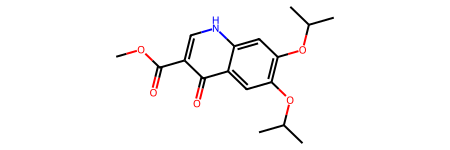

In [2]:
smiles = 'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'
mol = Chem.MolFromSmiles(smiles)
print(mol)
mol

In [3]:
smi = Chem.MolToSmiles(mol)
smi

'COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O'

In [4]:
Chem.MolToInchiKey(mol)

'VSIUFPQOEIKNCY-UHFFFAOYSA-N'

In [5]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

 23 24  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500   -1.2990    0

In [6]:
file = open('smiles.csv', 'r')
smiles = []
for line in file.readlines()[1:]:
    smiles.append(line.strip().split()[0])
print(smiles)

['C=C', 'C=O', 'C#N', 'CCO', 'CCC(=O)O', 'CN=C=O', 'C1=CCC=CC1', 'C1=CC=CC=C1', 'C1=C(C)C=CC=C1', 'C1CCC2CCCCC2C1']


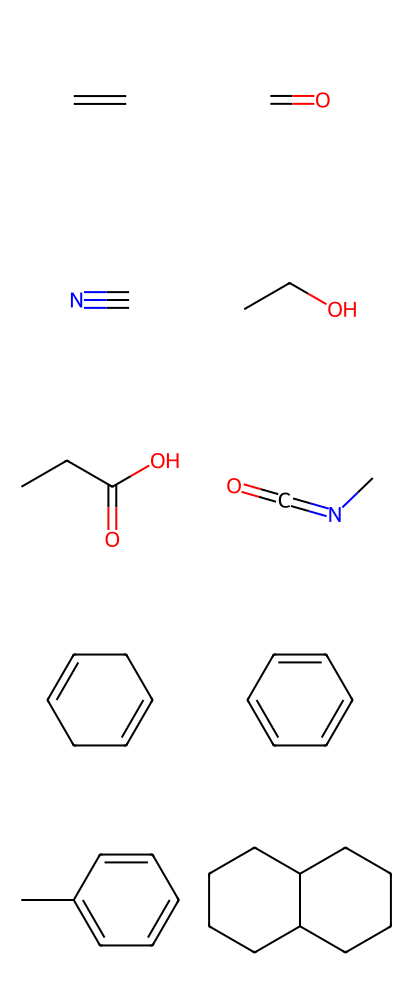

In [7]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [8]:
import pandas as pd
from rdkit.Chem import PandasTools

In [9]:
esol_data = pd.read_csv('smiles.csv')
esol_data.head(1)

,smiles
0,C=C


In [10]:
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

,smiles,ROMol
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1518d553b970>


In [11]:
print(type(esol_data.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


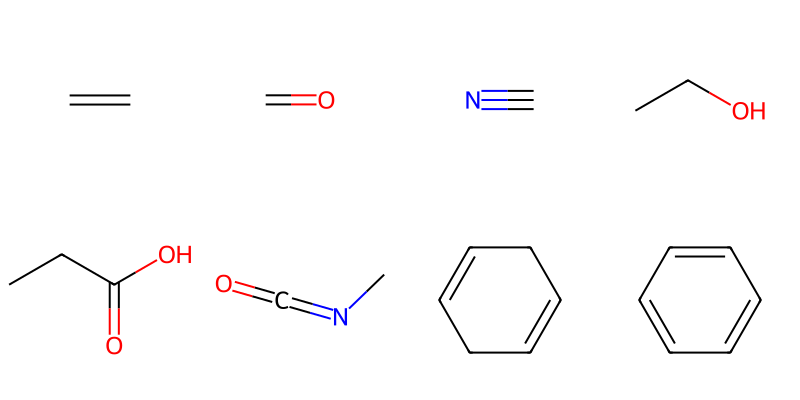

In [12]:
PandasTools.FrameToGridImage(esol_data.head(8), molsPerRow=4)

In [13]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data.head(1)

,smiles,ROMol,n_Atoms
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1518d553b970>,2


In [16]:
from psikit import Psikit
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [21]:
energies = []
for smi in esol_data.smiles:
    pk.read_from_smiles(smi)
    %time eng = pk.optimize()
    energies.append(eng)
print(energies)

Optimizer: Optimization complete!
CPU times: user 1.47 s, sys: 46.8 ms, total: 1.52 s
Wall time: 1.53 s
Optimizer: Optimization complete!
CPU times: user 1.21 s, sys: 29.9 ms, total: 1.24 s
Wall time: 1.29 s
Optimizer: Optimization complete!
CPU times: user 1.05 s, sys: 35 ms, total: 1.08 s
Wall time: 1.09 s
Optimizer: Optimization complete!
CPU times: user 4.36 s, sys: 87.4 ms, total: 4.45 s
Wall time: 4.48 s
Optimizer: Optimization complete!
CPU times: user 18.4 s, sys: 1.08 s, total: 19.5 s
Wall time: 19.6 s
Optimizer: Optimization complete!
CPU times: user 6.41 s, sys: 127 ms, total: 6.54 s
Wall time: 6.58 s
Optimizer: Optimization complete!
CPU times: user 17.4 s, sys: 1.24 s, total: 18.6 s
Wall time: 18.8 s
Optimizer: Optimization complete!
CPU times: user 5.95 s, sys: 400 ms, total: 6.35 s
Wall time: 6.4 s
Optimizer: Optimization complete!
CPU times: user 13.8 s, sys: 971 ms, total: 14.8 s
Wall time: 14.9 s
Optimizer: Optimization complete!
CPU times: user 1min 36s, sys: 9.72 s,

In [22]:
# Add energies column to dataframe
esol_data['Energy'] = energies
esol_data.head(1)

,smiles,ROMol,n_Atoms,Energy
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1518d553b970>,2,-78.038769


,smiles,ROMol,n_Atoms,Energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCO,,3,-154.089919
4,CCC(=O)O,,5,-266.858985
5,CN=C=O,,4,-206.795542
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552
9,C1CCC2CCCCC2C1,,10,-389.194170

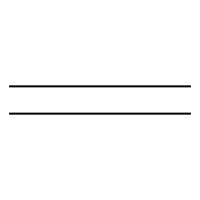
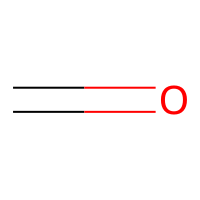
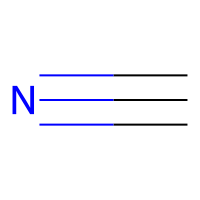
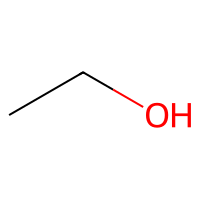
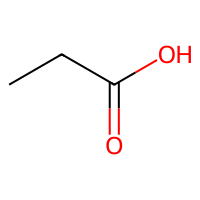
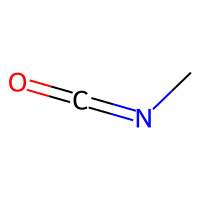
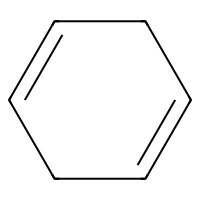
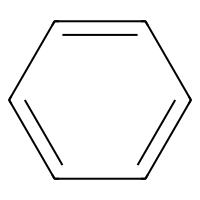
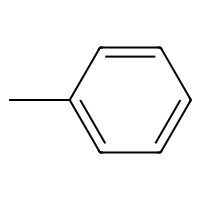
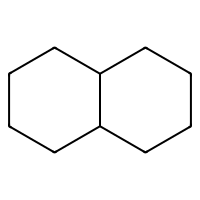

In [23]:
display(esol_data)